In [2]:
from poisson_sprinkling import *

In [9]:
runs = 900
rho = 100

In [10]:
Ns = []
for run in range(runs):
    points = poisson_sprinkle(rho, False)
    Ns.append(len(points))

(array([ 1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  2.,  1.,  0.,  3.,  5.,
         6.,  2.,  4.,  8., 12.,  5., 14., 19.,  7., 16., 29., 17., 24.,
        29., 27., 41., 30., 22., 33., 36., 40., 36., 31., 42., 39., 33.,
        29., 28., 23., 26., 21., 21., 18., 21., 17., 11., 13., 12.,  8.,
         4.,  7.,  1.,  7.,  4.,  1.,  1.,  3.,  1.,  1.,  0.,  1.,  0.,
         0.,  2.,  1.]),
 array([ 66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134.]),
 <BarContainer object of 68 artists>)

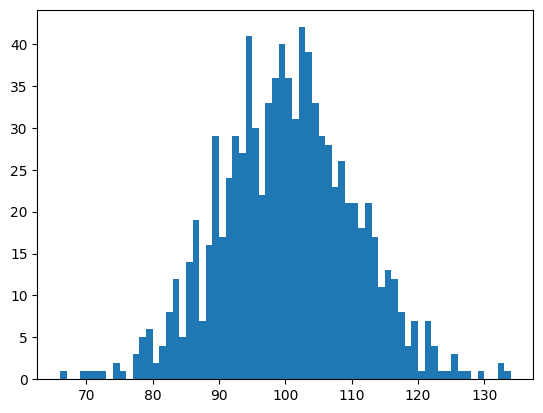

In [14]:
plt.hist(Ns, list(range(66, 135, 1)))

In [63]:
N_rel_totals = {}
N_rel_totals_squared = {}
rho_total_runs = {}

In [64]:
rho = list(range(10, 410, 10))
runs = 200

for p in rho:
    N_rel = 0
    N_rel_square = 0
    for run in range(runs):
        points = poisson_sprinkle(p)
        relations = find_relations(points)
        for i in range(len(relations)):
            N_rel += len(relations[i])
            N_rel_square += len(relations[i])**2
    if p in N_rel_totals:
        N_rel_totals[p] += N_rel
        N_rel_totals_squared[p] += N_rel_square
        rho_total_runs[p] += runs
    else:
        N_rel_totals[p] = N_rel
        N_rel_totals_squared[p] = N_rel_square
        rho_total_runs[p] = runs

In [65]:
print(N_rel_totals)

{10: 5035, 20: 19044, 30: 45243, 40: 79877, 50: 122287, 60: 176268, 70: 242000, 80: 316487, 90: 400614, 100: 499595, 110: 610861, 120: 705839, 130: 852269, 140: 977302, 150: 1128609, 160: 1275691, 170: 1436542, 180: 1622649, 190: 1783539, 200: 1977856, 210: 2191576, 220: 2429110, 230: 2652525, 240: 2906419, 250: 3121044, 260: 3394808, 270: 3644785, 280: 3929069, 290: 4196054, 300: 4460929, 310: 4829353, 320: 5079729, 330: 5401717, 340: 5752609, 350: 6114125, 360: 6487045, 370: 6848283, 380: 7176356, 390: 7624748, 400: 7926313}


In [66]:
print(N_rel_totals_squared)

{10: 27551, 20: 181698, 30: 648999, 40: 1490009, 50: 2820707, 60: 4814596, 70: 7766738, 80: 11498939, 90: 16260652, 100: 22630375, 110: 30557415, 120: 37849057, 130: 50087025, 140: 61942630, 150: 76254183, 160: 92120103, 170: 109396032, 180: 131435551, 190: 151582635, 200: 176676920, 210: 206518434, 220: 241951994, 230: 274501531, 240: 314534469, 250: 348987082, 260: 395769382, 270: 441562703, 280: 495554233, 290: 545325576, 300: 596490219, 310: 673031873, 320: 725479331, 330: 794385253, 340: 870493193, 350: 955469385, 360: 1044424503, 370: 1130507567, 380: 1215245350, 390: 1331249968, 400: 1411623033}


In [67]:
print(rho_total_runs)

{10: 200, 20: 200, 30: 200, 40: 200, 50: 200, 60: 200, 70: 200, 80: 200, 90: 200, 100: 200, 110: 200, 120: 200, 130: 200, 140: 200, 150: 200, 160: 200, 170: 200, 180: 200, 190: 200, 200: 200, 210: 200, 220: 200, 230: 200, 240: 200, 250: 200, 260: 200, 270: 200, 280: 200, 290: 200, 300: 200, 310: 200, 320: 200, 330: 200, 340: 200, 350: 200, 360: 200, 370: 200, 380: 200, 390: 200, 400: 200}


In [68]:
mus = {rho: N_rel_totals[rho] / rho_total_runs[rho] for rho in N_rel_totals}
vars = {rho: N_rel_totals_squared[rho] / rho_total_runs[rho] - mus[rho] for rho in N_rel_totals}
print(mus)

{10: 25.175, 20: 95.22, 30: 226.215, 40: 399.385, 50: 611.435, 60: 881.34, 70: 1210.0, 80: 1582.435, 90: 2003.07, 100: 2497.975, 110: 3054.305, 120: 3529.195, 130: 4261.345, 140: 4886.51, 150: 5643.045, 160: 6378.455, 170: 7182.71, 180: 8113.245, 190: 8917.695, 200: 9889.28, 210: 10957.88, 220: 12145.55, 230: 13262.625, 240: 14532.095, 250: 15605.22, 260: 16974.04, 270: 18223.925, 280: 19645.345, 290: 20980.27, 300: 22304.645, 310: 24146.765, 320: 25398.645, 330: 27008.585, 340: 28763.045, 350: 30570.625, 360: 32435.225, 370: 34241.415, 380: 35881.78, 390: 38123.74, 400: 39631.565}


In [69]:
sampling_std = {rho: (vars[rho]/rho_total_runs[rho])**0.5 for rho in vars}
print(sampling_std)

{10: 0.7502666192761077, 20: 2.016519278360611, 30: 3.8850868716156137, 40: 5.937448947148935, 50: 8.213434117347019, 60: 10.768388923139803, 70: 13.71562794770987, 80: 16.720086722263137, 90: 19.91233160631873, 100: 23.52168148751275, 110: 27.36172235075855, 120: 30.47261803652584, 130: 35.08374124861828, 140: 39.04014856529109, 150: 43.33750511969973, 160: 47.65616749173185, 170: 51.95177812163892, 180: 56.96773253342632, 190: 61.19622047152913, 200: 66.08688674767484, 210: 71.47147298048361, 220: 77.38263435681161, 230: 82.43922094488764, 240: 88.26494915876857, 250: 92.98736984128543, 260: 99.04223518277442, 270: 104.63244214869498, 280: 110.8631097344829, 290: 116.3109541272876, 300: 121.65826009770154, 310: 129.24806768381492, 320: 134.20130420379678, 330: 140.4442537094345, 340: 147.0323590234476, 350: 154.05804587881804, 360: 161.08518383141262, 370: 167.60513745109367, 380: 173.78643459718023, 390: 181.90830244933846, 400: 187.3297039980579}


In [70]:
densities = [p for p in mus]
averages = [mus[p] for p in mus]
errors = [sampling_std[p] for p in sampling_std]

The dimension $d$ of the MM estimator is related to the ordering fraction by,
$$\frac{R}{\frac{1}{2} N (N - 1)} = \frac{\Gamma(d + 1) \Gamma(\frac{d}{2})}{4\Gamma(\frac{3d}{2})}$$
where $R$ is the number of relations and $N$ is the number of points. For $d=2$, this correspondings to a $\frac{1}{4}$.

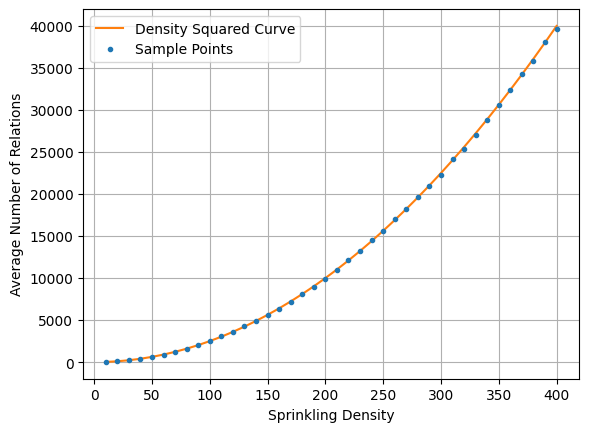

In [80]:
plt.errorbar(densities, averages, label = "Sample Points", fmt = ".")
plt.plot(densities, 0.25* np.array(densities)**2, label = "Density Squared Curve")
plt.grid()
plt.xlabel("Sprinkling Density")
plt.ylabel("Average Number of Relations")
plt.legend()

In [99]:
N_link_totals = {}
N_link_totals_square = {}
N_link_runs = {}

In [111]:
rho = [1000] #list(range(120, 410, 10))
runs = 1

for p in rho:
    N_links = 0
    N_links_square = 0
    for run in range(runs):
        points = poisson_sprinkle(p)
        links = causal_links(points)
        for i in range(len(links)):
            N_links += len(links[i])
            N_links_square += len(links[i])**2
    if p in N_link_totals:
        N_link_totals[p] += N_links
        N_link_totals_square[p] += N_links_square
        N_link_runs[p] += runs
    else:
        N_link_totals[p] = N_links
        N_link_totals_square[p] = N_links_square
        N_link_runs[p] = runs

In [112]:
mus_links = {rho: N_link_totals[rho] / N_link_runs[rho] for rho in N_link_totals}
vars_links = {rho: N_link_totals_square[rho] / N_link_runs[rho] - mus_links[rho] for rho in N_link_totals}


In [113]:
sampling_std_links = {rho: (vars_links[rho]/N_link_runs[rho])**0.5 for rho in vars_links}
print(sampling_std_links)

{10: 0.19902889237495142, 20: 0.3933509883043387, 30: 0.5978084977649615, 40: 0.7765468434035387, 50: 0.9262491565448252, 60: 1.087836154942462, 70: 1.2195490970026586, 80: 1.3667616836888572, 90: 1.4988078596004226, 100: 1.6405105912489564, 120: 3.785181633686817, 130: 3.990588928967753, 140: 4.285113767451221, 150: 4.446976500949831, 160: 4.6975312665271325, 170: 4.918373714959041, 180: 5.174804344127418, 190: 5.368854626454324, 200: 5.532287049674845, 210: 5.746250951707556, 220: 6.026790190474528, 230: 6.141840115144646, 240: 6.329881515478785, 250: 6.54881668700537, 260: 6.878313746842317, 270: 7.0727081093453865, 280: 7.167886717854852, 290: 7.3872457655069255, 300: 7.504611915349121, 310: 7.673291340748115, 320: 7.840280607223188, 330: 8.139017139679705, 340: 8.337445651996779, 350: 8.36694687445785, 360: 8.530615452591919, 370: 8.722006649848417, 380: 8.937538811104542, 390: 9.14597179090336, 400: 9.251680928350265, 1000: 176.15334229017625}


In [114]:
densities_links = [p for p in mus_links]
averages_links = [mus_links[p] for p in mus_links]
errors_links = [sampling_std_links[p] for p in sampling_std_links]

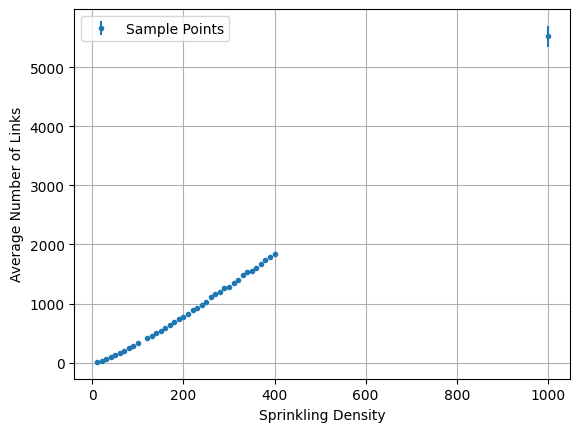

In [115]:
plt.errorbar(densities_links, averages_links, yerr = errors_links, label = "Sample Points", fmt = ".")
# plt.plot(densities, 0.25* np.array(densities)**2, label = "Density Squared Curve")
plt.grid()
plt.xlabel("Sprinkling Density")
plt.ylabel("Average Number of Links")
plt.legend()